### load / check original NTU data(60)

In [75]:
import numpy as np
import pickle as pk

ntu_npy = '/users/neuron2/Kinetic-GAN/data/NTU/train_data.npy'
ntu_label = '/users/neuron2/Kinetic-GAN/data/NTU/train_label.pkl'

In [76]:
data = np.load(ntu_npy)

with open(ntu_label, 'rb') as f:
    label = pk.load(f)

In [77]:
data.shape

(40091, 3, 300, 25, 2)

In [122]:
type(label[1][0])#2(name, label) x 40091(num) x 29 x 1
# name(29char)

int

### Check synthetic data

In [62]:
import numpy as np
import pickle as pkl
path = '/users/neuron2/Kinetic-GAN/runs/kinetic-gan/exp1/actions/60_10_trunc0.95_gen_data.npy'
label = '/users/neuron2/Kinetic-GAN/runs/kinetic-gan/exp1/actions/60_10_trunc0.95_gen_label.pkl'
path2 = '/users/neuron2/Kinetic-GAN/runs/kinetic-gan/exp1/actions/60_10_trunc0.95_gen_z.npy'

In [42]:
data = np.load(path)
datz = np.load(path2)

In [43]:
with open(label, 'rb') as f:
    label = pkl.load(f)

In [45]:
data.shape# class*sampleNum X xyz X frame X landmark X person

(600, 3, 64, 25, 1)

In [116]:
label[0][120]

'S012C001P015R001A049.skeleton'

In [46]:
sample = data[0]
sample.shape

(3, 64, 25, 1)

In [47]:
x = sample[0]
y = sample[1]

In [50]:
x = x.squeeze()
y = y.squeeze()

(64, 25)

#### Draw skeleton with bone and joint

In [53]:
limb_info = [(0,1),(0,16),(0,12),(12,13),(13,14),(14,15),(16,17),(17,18),(18,19),
(1,20),(20,4),(20,8),(20,2),(2,3),(20,4),(4,5),(5,6),(6,7),(7,21),(21,22),(7,22),
(20,8),(8,9),(9,10),(10,11),(11,23),(23,24),(24,11)]

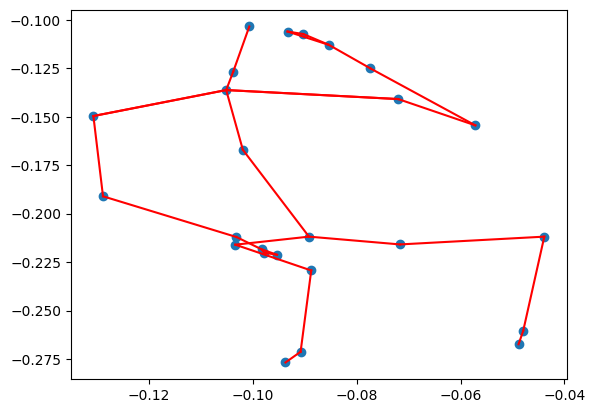

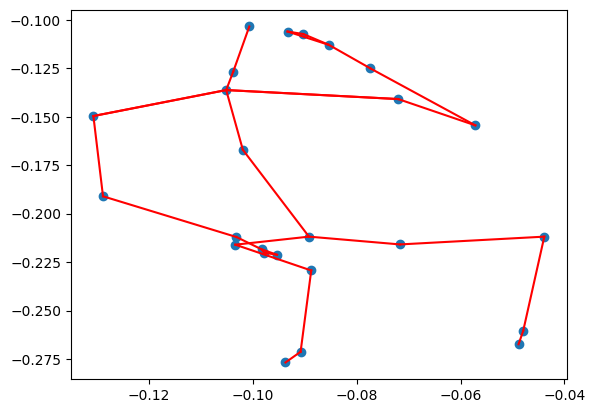

In [59]:
import matplotlib.pyplot as plt
from IPython import display

for xc, yc in zip(x, y):

    for l in limb_info:
        x1 = xc[l[0]]
        x2 = xc[l[1]]
        y1 = yc[l[0]]
        y2 = yc[l[1]]
        plt.plot([x1, x2], [y1, y2], color="red")
       
    plt.scatter(xc, yc)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.show()

### evaluate NTU training with FID score

In [1]:
!python evaluation/fid-actions.py data/NTU/train_data.npy data/NTU/train_label.pkl runs/kinetic-gan/exp1/actions/60_10_trunc0.95_gen_data.npy runs/kinetic-gan/exp1/actions/60_10_trunc0.95_gen_label.pkl

Namespace(batch_size=16, dataset='keti', device='cuda:0', dims=2048, path=['data/NTU/train_data.npy', 'data/NTU/train_label.pkl', 'runs/kinetic-gan/exp1/actions/60_10_trunc0.95_gen_data.npy', 'runs/kinetic-gan/exp1/actions/60_10_trunc0.95_gen_label.pkl'], t_size=64)
block_idx 3
/home/neuron2/anaconda3/envs/kineGAN/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/home/neuron2/anaconda3/envs/kineGAN/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
(40091, 3, 300, 25, 2)
None
40091
100%|███████████████████████████████████████|

### train loss plot

In [2]:
import matplotlib.pyplot as plt
import scipy.io

mat_file_name =  "/users/neuron2/Kinetic-GAN/runs/kinetic-gan/exp1/plot_loss.mat"
mat_file = scipy.io.loadmat(mat_file_name)

In [3]:
print(type(mat_file))
for i in mat_file:
    print(i)

<class 'dict'>
__header__
__version__
__globals__
d_loss
g_loss


In [4]:
d_loss = mat_file['d_loss']
g_loss = mat_file['g_loss']
g_loss.shape, d_loss.shape

((1, 1502400), (1, 1502400))

In [5]:
xmin = 0
ymin = min(min(d_loss[0]), min(g_loss[0]))
ymax = max(max(d_loss[0]), max(g_loss[0]))
ymin,ymax

(-52.443085, 448.1213)

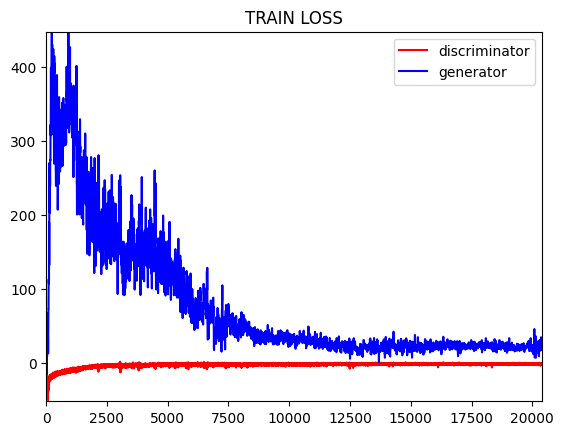

In [7]:
plt.title("TRAIN LOSS")
plt.axis([0, 20400, ymin, ymax])
plt.plot(d_loss[0], label="discriminator", color='red')
plt.plot(g_loss[0], label="generator", color="blue")
plt.legend()
plt.show()